<h1>Curso Intensivo de Python </h1> 
<h2> Análise sobre Acidentes Aéreos no Brasil</h2> <br/>
     Equipe: Arthur Brito <br/>
             Juliana Mafra <br/>
             Pedro Arthur 


<h2> Introdução </h2>

Atualmente, os aviões são considerados o meio de transporte mais seguro do mundo, perdendo apenas para os elevadores. 
Durante o projeto de conclusão, realizamos uma análise sobre o número de acidentes aéreos ocorridos no Brasil durante um período de dez anos. 

Para esta análise, utilizaremos dois datasets:

<b>Ocorrencia.csv:</b> possui os dados sobre cada ocorrência registrada no período de 2006 a 2015. 

<b>Aeronave.csv: </b> informações agrupadas sobre as aeronaves envolvidas nas ocorrências registradas no arquivo <b> ocorrencia.csv </b>.

Para a geração de gráficos, utilizamos as bibliotecas:

<b>pandas: </b> Biblioteca do python que possui as estruturas de dados DataFrame e Series.   

<b>matplotlib </b> Biblioteca do python que possui métodos para visualização de gráficos. 


Dividimos a análise dos dados em <b> cinco </b> etapas:
 1. Limpeza dos Dados 
 2. Análise de Dados Exploratória 
 3. Visualização dos Dados 
 4. Engenharia de Recursos 
 5. Geração de Insights.
<h2> 1. Limpeza dos Dados </h2>

Inicialmente, realizamos a importação dos dois arquivos "cvs" e excluímos colunas não relevantes para nossa análise e substituímos valores inconsistentes em algumas colunas.  

No dataset <b>Aeronave.csv </b> excluímos as colunas 'registration', 'engines_amount', 'seatings_amount', 'registration_category', 'extraction_day', 'occurrence_id'.

No dataset <b> Ocorrencia.csv </b> excluímos as colunas 'occurrence_id', 'report_number', 'published_report', 'recommendation_amount', 'extraction_day'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

<h3>ABRINDO O CSV DE ACIDENTES

In [2]:
acidentes=pd.read_csv('aircrafts.csv' ,encoding='latin-1', sep=',')
acidentes

,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,****,****,ASCENSION,REGULAR,NONE,NaN,2016-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,2038,36454,53473,PUXXX4,3992,ULTRALIGHT,***,***,UNKNOWN,NaN,...,BRAZIL,TPP,PRIVATE,SDMH,SDMH,CRUISE,PRIVATE,SUBSTANTIAL,1.0,2016-07-30
2039,2039,36455,53556,PUXXX5,3992,ULTRALIGHT,***,***,UNKNOWN,NaN,...,BRAZIL,PET,EXPERIMENTAL,SDMH,SDMH,CRUISE,PRIVATE,DESTROYED,1.0,2016-07-30
2040,2040,38934,60649,ZPBIL,3992,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,1.0,...,NaN,EXT,UNKNOWN,SDEN,SBNF,TAKEOFF,PRIVATE,SUBSTANTIAL,NaN,2016-07-30
2041,2041,38941,60879,ZPTVU,3992,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,NaN,...,NaN,EXT,UNKNOWN,****,****,MANEUVER,AGRICULTURAL,DESTROYED,2.0,2016-07-30


<H5>TRATANDO O ARQUIVO

In [3]:
acidentesTrat = acidentes.drop(columns=['Unnamed: 0'])

In [4]:
acidentesTrat = acidentesTrat.drop(columns=['registration', 'engines_amount', 'seatings_amount', 'registration_category', 'extraction_day'])
acidentesTrat

,aircraft_id,occurrence_id,operator_id,equipment,manufacturer,model,engine_type,takeoff_max_weight (Lbs),year_manufacture,registration_country,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount
0,4,45602,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1455,1962.0,BRAZIL,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN
1,40,53551,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1455,1960.0,BRAZIL,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN
2,118,43721,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,5092,1966.0,BRAZIL,AEROTAXI,****,****,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN
3,130,35556,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,3600,1979.0,BRAZIL,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN
4,191,32579,4365,AIRPLANE,BOEING COMPANY,737-241,JET,115497,1975.0,BRAZIL,REGULAR,****,****,ASCENSION,REGULAR,NONE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,36454,53473,3992,ULTRALIGHT,***,***,UNKNOWN,881,2000.0,BRAZIL,PRIVATE,SDMH,SDMH,CRUISE,PRIVATE,SUBSTANTIAL,1.0
2039,36455,53556,3992,ULTRALIGHT,***,***,UNKNOWN,0,2015.0,BRAZIL,EXPERIMENTAL,SDMH,SDMH,CRUISE,PRIVATE,DESTROYED,1.0
2040,38934,60649,3992,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,3849,1997.0,NaN,UNKNOWN,SDEN,SBNF,TAKEOFF,PRIVATE,SUBSTANTIAL,NaN
2041,38941,60879,3992,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,6613,NaN,NaN,UNKNOWN,****,****,MANEUVER,AGRICULTURAL,DESTROYED,2.0


In [5]:
acidentesTrat = acidentesTrat.fillna(0)

In [6]:
acidentesTrat = acidentesTrat.replace('***', 'Nao informado')
acidentesTrat = acidentesTrat.replace('****', 'Nao informado')

In [7]:
acidentesTrat.to_csv("acidentes_tratada.csv", index=False, encoding='latin-1')

<h5>DANDO SORT NO CSV DE ACORDO COM "OCCURENCE_ID"

In [8]:
acidentesTrat = acidentesTrat.sort_values('occurrence_id')
acidentesTrat.reset_index(inplace=True)
acidentesTrat = acidentesTrat.drop(columns={'index'})
acidentesTrat

,aircraft_id,occurrence_id,operator_id,equipment,manufacturer,model,engine_type,takeoff_max_weight (Lbs),year_manufacture,registration_country,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount
0,9035,25799,3992,AIRPLANE,PIPER AIRCRAFT,PA-34-220T,PISTON,4750,1997.0,BRAZIL,PRIVATE,Nao informado,Nao informado,DESCEND,PRIVATE,DESTROYED,2.0
1,9036,25819,90,AIRPLANE,CESSNA AIRCRAFT,A188B,PISTON,4199,1974.0,BRAZIL,AGRICULTURAL,Nao informado,Nao informado,LOW ALTITUDE NAVIGATION,AGRICULTURAL,SUBSTANTIAL,0.0
2,6794,25820,4062,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-711,PISTON,2649,1976.0,BRAZIL,AEROTAXI,Nao informado,Nao informado,UNKNOWN,AEROTAXI,SUBSTANTIAL,0.0
3,9038,25839,3992,AIRPLANE,CESSNA AIRCRAFT,172RG,PISTON,2649,1982.0,BRAZIL,PRIVATE,Nao informado,Nao informado,UNKNOWN,PRIVATE,UNKNOWN,4.0
4,3653,25999,181,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1455,1960.0,BRAZIL,INSTRUCTION,Nao informado,Nao informado,UNKNOWN,INSTRUCTION,UNKNOWN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,21927,60645,114,AIRPLANE,LAVIASA,PA-25-260,PISTON,2899,2012.0,BRAZIL,AGRICULTURAL,SDVS,SDVS,SPECIALIZED,AGRICULTURAL,SUBSTANTIAL,0.0
2039,38934,60649,3992,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,3849,1997.0,0,UNKNOWN,SDEN,SBNF,TAKEOFF,PRIVATE,SUBSTANTIAL,0.0
2040,11088,60783,2385,HELICOPTER,EUROCOPTER FRANCE,AS 350 B2,TURBOSHAFT,4960,1997.0,BRAZIL,DIRECT ADMINISTRATION,Nao informado,SBLJ,TAKEOFF,POLICIAL,SUBSTANTIAL,0.0
2041,38941,60879,3992,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,6613,0.0,0,UNKNOWN,Nao informado,Nao informado,MANEUVER,AGRICULTURAL,DESTROYED,2.0


<h3>ABRINDO O CSV DE OCORRÊNCIAS

In [9]:
ocor = pd.read_csv('occurrences.csv', sep=',', encoding='latin-1')
ocor

,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,2022,36116,SERIOUS INCIDENT,LOSS OF COMPONENT DURING THE FLIGHT,MEDELLIN,EX,COLOMBIA,****,2009-03-26,04:46:00,UNKNOWN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2023,2023,33715,SERIOUS INCIDENT,ANOTHER TYPES,LIMA,EX,PERU,****,2006-10-31,00:00:00,UNKNOWN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2024,2024,25839,ACCIDENT,COLLISION AGAINST OBSTACLE ON THE GROUND,MENDONZA,EX,ARGENTINA,****,2006-01-03,00:00:00,UNKNOWN,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2025,2025,49474,ACCIDENT,METEOROLOGICAL PHENOMENOM IN THE AIR,ÁGUAS INTERNACIONAIS,***,BRAZIL,****,2013-09-01,00:00:00,YES,CENIPA,IN PROGRESS,NaN,NaN,NaN,0,1,NaN,2016-07-30


<h5>TRATANDO AS COLUNAS

In [10]:
ocor = ocor.drop(columns=['Unnamed: 0'])

In [11]:
ocor = ocor.drop(columns=['report_number', 'published_report', 'recommendation_amount', 'extraction_day'])


In [12]:
ocor = ocor.replace('****', 'Nao informado')
ocor = ocor.replace('***', 'INT')


In [13]:
ocor['investigation_status'] = ocor['investigation_status'].fillna('DESCONHECIDO')

In [14]:
ocor['takeoff'] = ocor['takeoff'].fillna(0)
ocor['publication_day'] = ocor['publication_day'].fillna('UNKNOWN')

In [15]:
ocor['CONTAGEM'] = 1

<h5>DANDO SORT EM 'OCOR' DE ACORDO COM O "OCCURRENCE_ID"</h5>
<p>Isso será necessário para criar colunas de ano, mês e dia em acidentesTrat

In [16]:
ocor = ocor.sort_values('occurrence_id')
ocor.reset_index(inplace=True)
ocor = ocor.drop(columns={'index'})
ocor.head()

,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,publication_day,aircrafts_involved,takeoff,CONTAGEM
0,25799,ACCIDENT,COLLISION AGAINST OBSTACLE DURING THE FLIGHT,SÃO PAULO,SP,BRAZIL,Nao informado,2006-01-02,11:40:00,YES,SERIPA-4,IN PROGRESS,UNKNOWN,1,0.0,1
1,25819,ACCIDENT,LOW ALTITUDE MANEUVERS,GUAÍBA,RS,BRAZIL,Nao informado,2006-01-12,20:00:00,YES,SERIPA-5,IN PROGRESS,UNKNOWN,1,0.0,1
2,25820,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,OIAPOQUE,AP,BRAZIL,Nao informado,2006-01-02,12:40:00,YES,SERIPA-1,IN PROGRESS,UNKNOWN,1,0.0,1
3,25839,ACCIDENT,COLLISION AGAINST OBSTACLE ON THE GROUND,MENDONZA,EX,ARGENTINA,Nao informado,2006-01-03,00:00:00,UNKNOWN,CENIPA,DESCONHECIDO,UNKNOWN,1,0.0,1
4,25999,SERIOUS INCIDENT,STRUCTURAL FAILURE,ELDORADO DO SUL,RS,BRAZIL,Nao informado,2006-01-12,14:50:00,YES,SERIPA-5,IN PROGRESS,UNKNOWN,1,0.0,1


<h5>CRIANDO NOVAS COLUNAS PARA MÊS, DIA E ANO

In [17]:
ano = ocor.occurrence_day.str.split('-').str[0].tolist()
mes = ocor.occurrence_day.str.split('-').str[1].tolist()
dia = ocor.occurrence_day.str.split('-').str[2].tolist()
ocor['ano'] = ano
ocor['dia'] = dia
ocor['mes'] = mes
acidentesTrat['ano'] = ocor['ano']
acidentesTrat['mes'] = ocor['mes']
acidentesTrat['dia'] = ocor['dia']
ocor

,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,publication_day,aircrafts_involved,takeoff,CONTAGEM,ano,dia,mes
0,25799,ACCIDENT,COLLISION AGAINST OBSTACLE DURING THE FLIGHT,SÃO PAULO,SP,BRAZIL,Nao informado,2006-01-02,11:40:00,YES,SERIPA-4,IN PROGRESS,UNKNOWN,1,0.0,1,2006,02,01
1,25819,ACCIDENT,LOW ALTITUDE MANEUVERS,GUAÍBA,RS,BRAZIL,Nao informado,2006-01-12,20:00:00,YES,SERIPA-5,IN PROGRESS,UNKNOWN,1,0.0,1,2006,12,01
2,25820,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,OIAPOQUE,AP,BRAZIL,Nao informado,2006-01-02,12:40:00,YES,SERIPA-1,IN PROGRESS,UNKNOWN,1,0.0,1,2006,02,01
3,25839,ACCIDENT,COLLISION AGAINST OBSTACLE ON THE GROUND,MENDONZA,EX,ARGENTINA,Nao informado,2006-01-03,00:00:00,UNKNOWN,CENIPA,DESCONHECIDO,UNKNOWN,1,0.0,1,2006,03,01
4,25999,SERIOUS INCIDENT,STRUCTURAL FAILURE,ELDORADO DO SUL,RS,BRAZIL,Nao informado,2006-01-12,14:50:00,YES,SERIPA-5,IN PROGRESS,UNKNOWN,1,0.0,1,2006,12,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,60645,ACCIDENT,FUEL STARVATION,SERTÃOZINHO,SP,BRAZIL,Nao informado,2015-12-15,13:00:00,YES,SERIPA-4,IN PROGRESS,UNKNOWN,1,0.0,1,2015,15,12
2023,60649,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,PORTO BELO,SC,BRAZIL,SDEN,2015-12-31,14:00:00,YES,CENIPA,DESCONHECIDO,UNKNOWN,1,1.0,1,2015,31,12
2024,60783,ACCIDENT,COLLISION AGAINST OBSTACLE DURING THE FLIGHT,LAGES,SC,BRAZIL,Nao informado,2015-12-13,14:00:00,YES,SERIPA-5,IN PROGRESS,UNKNOWN,1,0.0,1,2015,13,12
2025,60879,ACCIDENT,COLLISION AGAINST OBSTACLE DURING THE FLIGHT,EXTERIOR,EX,PARAGUAY,Nao informado,2008-02-03,20:40:00,NO,CENIPA,DESCONHECIDO,UNKNOWN,1,0.0,1,2008,03,02


In [18]:
ocor = ocor.drop(columns={'occurrence_day'})

In [19]:
acidentesTrat['ano']

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2038     NaN
2039     NaN
2040     NaN
2041     NaN
2042     NaN
Name: ano, Length: 2043, dtype: object

<h3>Criando uma coluna de anos de forma correta no dataframe acidentesTrat

<p>Esta nova coluna possui valores crescentes de 0 a 2026, apesar de o dataframe ter 2043 linhas, pois quando o "occurrence_id" se repete uma linha após a outra, significa que o acidente foi o mesmo, só que envolvendo mais de um avião, por isso o ano se repete.

In [20]:
list = acidentesTrat['occurrence_id'].tolist()
acidentesTrat['ANO CERTO'] = 0
acidentesTrat['MES CERTO'] = 0
acidentesTrat['DIA CERTO'] = 0
count=0
for x in range (0,len(list)-1):
    if x>0:
        if list[x] == list[x-1]:
            count+=1
        acidentesTrat['ANO CERTO'][x] = acidentesTrat['ano'][x-count]
        acidentesTrat['MES CERTO'][x] = acidentesTrat['mes'][x-count]
        acidentesTrat['DIA CERTO'][x] = acidentesTrat['dia'][x-count]
    else:
        acidentesTrat['ANO CERTO'][x] = acidentesTrat['ano'][x]
        acidentesTrat['MES CERTO'][x] = acidentesTrat['mes'][x]
        acidentesTrat['DIA CERTO'][x] = acidentesTrat['dia'][x]
acidentesTrat['ANO CERTO'][2042] = 2015
acidentesTrat['MES CERTO'][2042] = 2
acidentesTrat['DIA CERTO'][2042] = 11

C:\Users\arthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\arthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\arthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\arthu\Anaconda3\lib\si

In [21]:
acidentesTrat

,aircraft_id,occurrence_id,operator_id,equipment,manufacturer,model,engine_type,takeoff_max_weight (Lbs),year_manufacture,registration_country,...,operation_phase,type_operation,damage_level,fatalities_amount,ano,mes,dia,ANO CERTO,MES CERTO,DIA CERTO
0,9035,25799,3992,AIRPLANE,PIPER AIRCRAFT,PA-34-220T,PISTON,4750,1997.0,BRAZIL,...,DESCEND,PRIVATE,DESTROYED,2.0,2006,01,02,2006,1,2
1,9036,25819,90,AIRPLANE,CESSNA AIRCRAFT,A188B,PISTON,4199,1974.0,BRAZIL,...,LOW ALTITUDE NAVIGATION,AGRICULTURAL,SUBSTANTIAL,0.0,2006,01,12,2006,1,12
2,6794,25820,4062,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-711,PISTON,2649,1976.0,BRAZIL,...,UNKNOWN,AEROTAXI,SUBSTANTIAL,0.0,2006,01,02,2006,1,2
3,9038,25839,3992,AIRPLANE,CESSNA AIRCRAFT,172RG,PISTON,2649,1982.0,BRAZIL,...,UNKNOWN,PRIVATE,UNKNOWN,4.0,2006,01,03,2006,1,3
4,3653,25999,181,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1455,1960.0,BRAZIL,...,UNKNOWN,INSTRUCTION,UNKNOWN,0.0,2006,01,12,2006,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,21927,60645,114,AIRPLANE,LAVIASA,PA-25-260,PISTON,2899,2012.0,BRAZIL,...,SPECIALIZED,AGRICULTURAL,SUBSTANTIAL,0.0,NaN,NaN,NaN,2015,12,15
2039,38934,60649,3992,AIRPLANE,BEECH AIRCRAFT,B36TC,PISTON,3849,1997.0,0,...,TAKEOFF,PRIVATE,SUBSTANTIAL,0.0,NaN,NaN,NaN,2015,12,31
2040,11088,60783,2385,HELICOPTER,EUROCOPTER FRANCE,AS 350 B2,TURBOSHAFT,4960,1997.0,BRAZIL,...,TAKEOFF,POLICIAL,SUBSTANTIAL,0.0,NaN,NaN,NaN,2015,12,13
2041,38941,60879,3992,UNKNOWN,WZQ-OKECIE,PZL 106 KRUK,UNKNOWN,6613,0.0,0,...,MANEUVER,AGRICULTURAL,DESTROYED,2.0,NaN,NaN,NaN,2008,2,3


In [22]:
acidentesTrat['ANO CERTO'][acidentesTrat['ANO CERTO'] == 2007].groupby(acidentesTrat['occurrence_id']).value_counts()

occurrence_id  ANO CERTO
28256          2007         1
28335          2007         1
28355          2007         1
28375          2007         1
28377          2007         1
                           ..
44751          2007         1
44753          2007         1
44755          2007         1
44757          2007         1
44759          2007         1
Name: ANO CERTO, Length: 126, dtype: int64

In [23]:
pd.set_option('display.max_rows', None)
acidentesTrat.head()

,aircraft_id,occurrence_id,operator_id,equipment,manufacturer,model,engine_type,takeoff_max_weight (Lbs),year_manufacture,registration_country,...,operation_phase,type_operation,damage_level,fatalities_amount,ano,mes,dia,ANO CERTO,MES CERTO,DIA CERTO
0,9035,25799,3992,AIRPLANE,PIPER AIRCRAFT,PA-34-220T,PISTON,4750,1997.0,BRAZIL,...,DESCEND,PRIVATE,DESTROYED,2.0,2006,01,02,2006,1,2
1,9036,25819,90,AIRPLANE,CESSNA AIRCRAFT,A188B,PISTON,4199,1974.0,BRAZIL,...,LOW ALTITUDE NAVIGATION,AGRICULTURAL,SUBSTANTIAL,0.0,2006,01,12,2006,1,12
2,6794,25820,4062,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-711,PISTON,2649,1976.0,BRAZIL,...,UNKNOWN,AEROTAXI,SUBSTANTIAL,0.0,2006,01,02,2006,1,2
3,9038,25839,3992,AIRPLANE,CESSNA AIRCRAFT,172RG,PISTON,2649,1982.0,BRAZIL,...,UNKNOWN,PRIVATE,UNKNOWN,4.0,2006,01,03,2006,1,3
4,3653,25999,181,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1455,1960.0,BRAZIL,...,UNKNOWN,INSTRUCTION,UNKNOWN,0.0,2006,01,12,2006,1,12


In [24]:
ocor2 = ocor
ocor2.to_csv("acidentes_tratada.csv", index=False, encoding='latin-1')

<h1>VIZUALIZAÇÃO DE DADOS

<h2>NÚMERO DE OCORRÊNCIAS

<p> Verificamos que houve um total de 2027 ocorrências de acidentes aéreos nos dez anos analisados (2006 a 2015) e  2043 aeronaves envolvidas nesses acidentes. Alguns acidentes envolveram mais de uma aeronave o que justifica o número de linhas distintos obtidos nesse resultado.


In [25]:
ocor['aircrafts_involved'].value_counts()

1    2013
2      13
4       1
Name: aircrafts_involved, dtype: int64

<p>Dessa forma, pode-se observar que há 16 valores repetidos, que é exatamete a diferença de linhas entre as duas tabelas

<h2>NÚMERO OCORRÊNCIAS DISTRIBUIDAS POR ANO

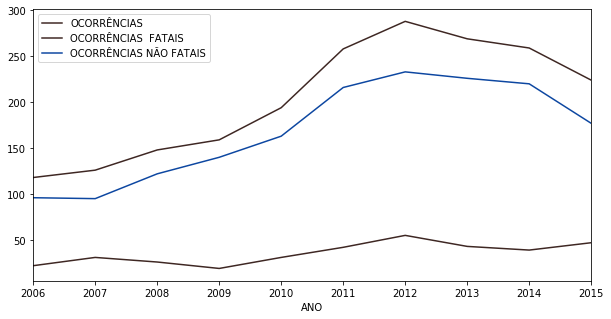

In [26]:
acidentesTrat['fatalities_amount'].groupby(acidentesTrat['ANO CERTO']).count().plot.line(color=random.choice(colors), figsize=(10,5))
acidentesTrat['fatalities_amount'][acidentesTrat['fatalities_amount'] >= 1].groupby(acidentesTrat['ANO CERTO']).count().plot.line(color=random.choice(colors), figsize=(10,5))
acidentesTrat['fatalities_amount'][acidentesTrat['fatalities_amount'] == 0].groupby(acidentesTrat['ANO CERTO']).count().plot.line(color=random.choice(colors), figsize=(10,5))

plt.xlabel('ANO')
plt.legend(['OCORRÊNCIAS', 'OCORRÊNCIAS  FATAIS', 'OCORRÊNCIAS NÃO FATAIS'], loc='upper left')


<p>Esse gráfico demosntra que, ao contrário do que o senso comum possa dizer, o número de ocorrências não fatais é muito maior do que o de ocorrências fatais

<h2>NÚMERO DE MORTOS POR ANO

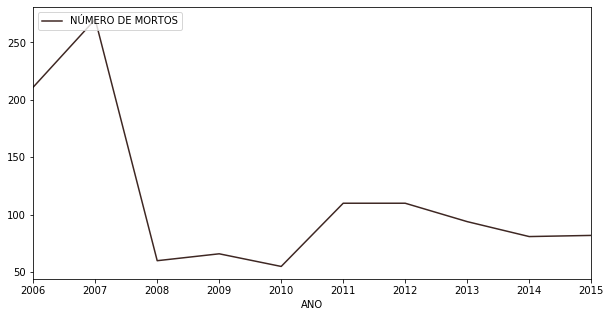

In [27]:
acidentesTrat['fatalities_amount'].groupby(acidentesTrat['ANO CERTO']).sum().plot(color=random.choice(colors), figsize=(10,5))

plt.xlabel('ANO')
plt.legend(['NÚMERO DE MORTOS'], loc='upper left')

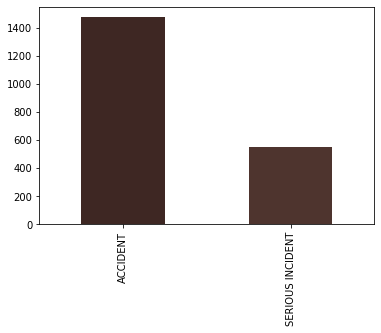

In [28]:
ocor['classification'].value_counts().plot.bar(color = random.choice(colors))

<h2>TIPO DE VOOS DE ACORDO COM A QUANTIDADE DE OCORRÊNCIAS

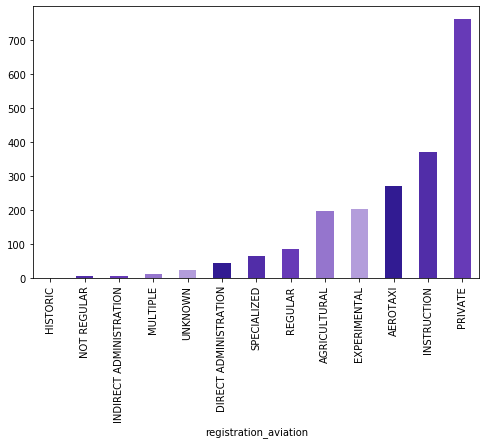

In [29]:
acidentesTrat['fatalities_amount'].groupby(acidentesTrat['registration_aviation']).count().sort_values().plot.bar(figsize=(8,5), color=random.choice(colors))

<h2>TIPO DE VOO QUE CAUSA MAIS FATALIDADES

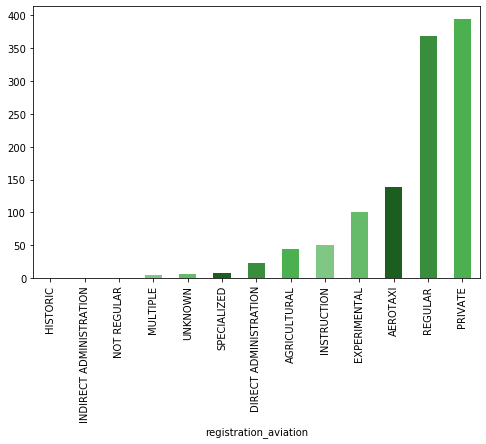

In [30]:
acidentesTrat['fatalities_amount'].groupby(acidentesTrat['registration_aviation']).sum().sort_values().plot.bar(figsize=(8,5), color=random.choice(colors))

<p>A partir disso podemos observar que o voos privados caem bem mais que voos regulares, mostrando asism, que eles são menos fiscalizados 
    (Obs: procurar saber o número de voos privados e regulares que decolaram)

<h2>TIPO DE AERONAVE QUE CAUSA MAIS OCORRÊNCIAS

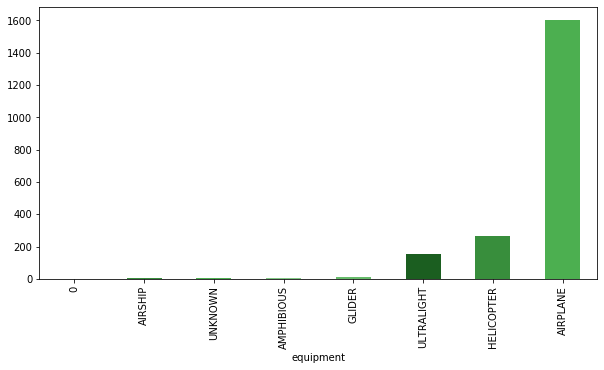

In [31]:
acidentesTrat['fatalities_amount'].groupby(acidentesTrat['equipment']).count().sort_values().plot.bar(color=random.choice(colors), figsize=(10,5))

<h2>TIPO DE AERONAVE QUE CAUSA MAIS FATALIDADES

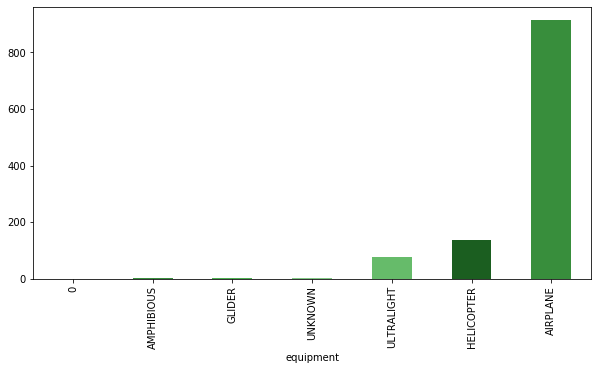

In [32]:
acidentesTrat['fatalities_amount'][acidentesTrat['fatalities_amount'] >=1].groupby(acidentesTrat['equipment']).sum().sort_values().plot.bar(color=random.choice(colors), figsize=(10,5))

<h2>ESTADOS COM MAIOR NÚMERO DE ACIDENTES AÉREOS

Text(0.5, 0, 'ESTADO')

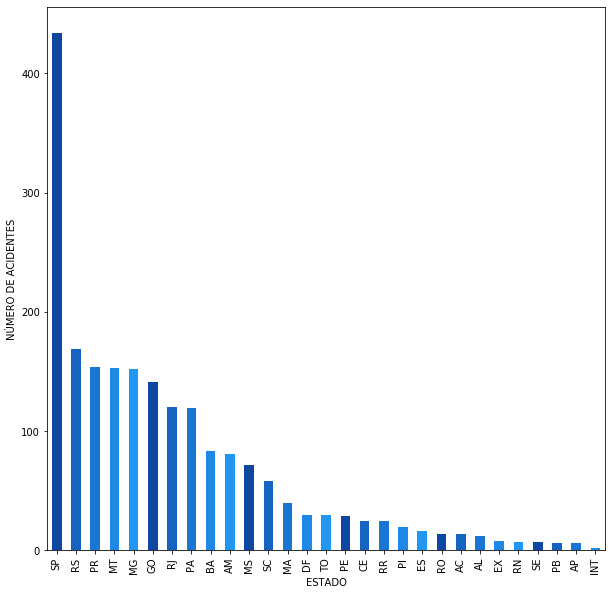

In [33]:
ocor['fu'].value_counts().plot.bar(figsize=(10,10), color=random.choice(colors))
plt.ylabel('NÚMERO DE ACIDENTES')
plt.xlabel('ESTADO')

<h2>QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO

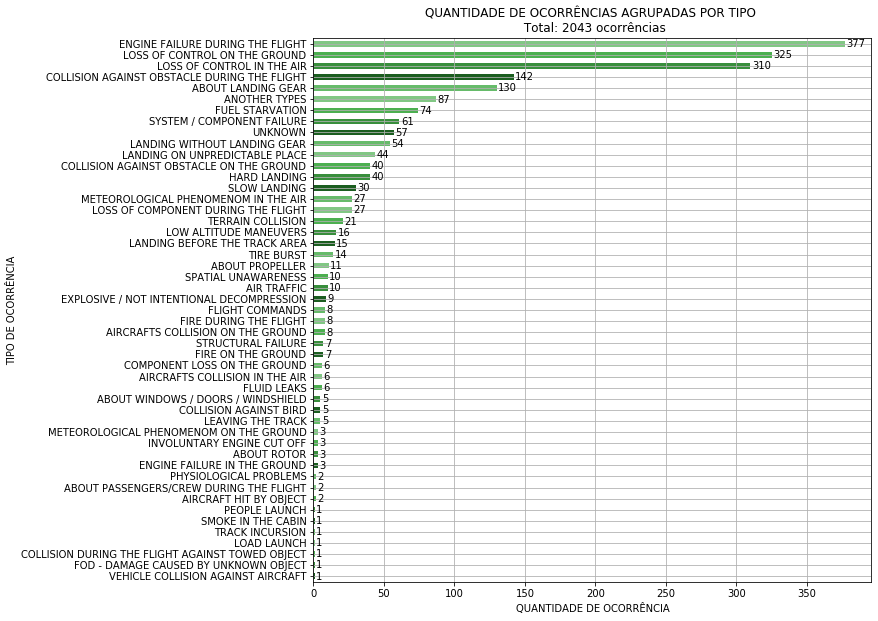

In [34]:
ax = ocor.groupby('type of occurrence')['CONTAGEM'].sum().sort_values().plot.barh(color=random.choice(colors), figsize=(10,10), grid=True)

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ocor['aircrafts_involved'].sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

<p>A partir disso, podemos observar que o maior número de acidentes ocorre por falhas humanas

<h2>OCORRÊNCIAS DE ACORDO COM A FASE DE OPERAÇÃO

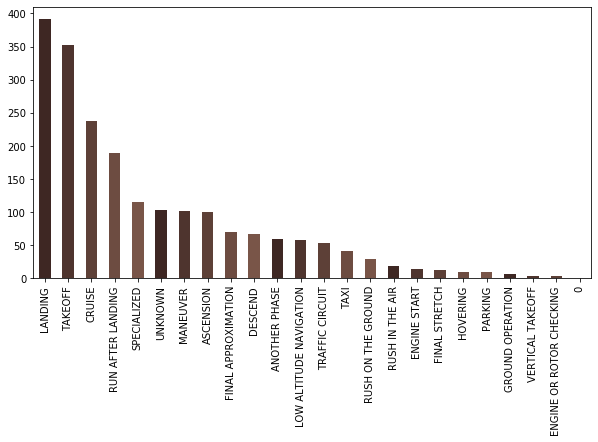

In [35]:
acidentesTrat['operation_phase'].value_counts().plot.bar(figsize=(10,5), color = random.choice(colors))

<h2>NÚMERO DE ACIDENTES EM CADA MOMENTO DE VOO

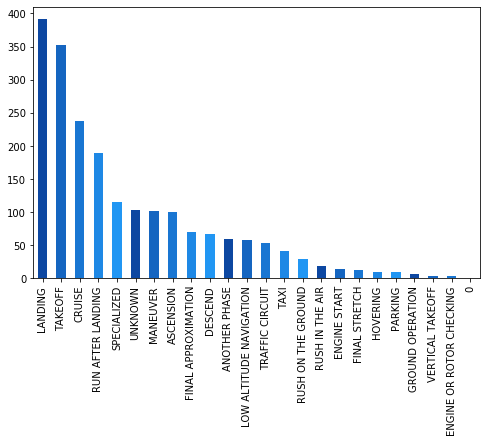

In [36]:
acidentesTrat['operation_phase'].value_counts().plot.bar(color=random.choice(colors), figsize=(8,5))

<h2>ESTADOS QUE POSSUEM MAIS DE 10 OCORRÊNCIAS

Text(0.5, 1.0, 'ESTADOS QUE POSSUEM MAIS DE 10 OCORRÊNCIAS')

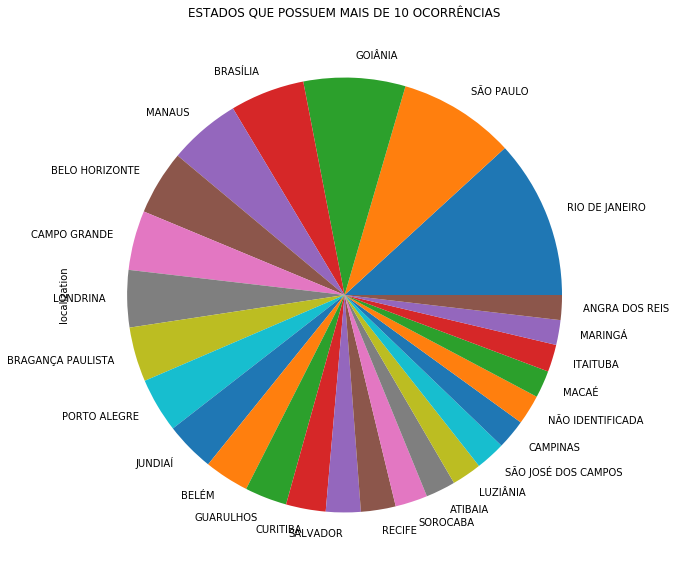

In [37]:
ocor['localization'].value_counts()[ocor['localization'].value_counts() >= 10].plot.pie(figsize=(10,10))
plt.title('ESTADOS QUE POSSUEM MAIS DE 10 OCORRÊNCIAS')

<h2>NUMERO DE OCORRENCIAS POR OPERADOR

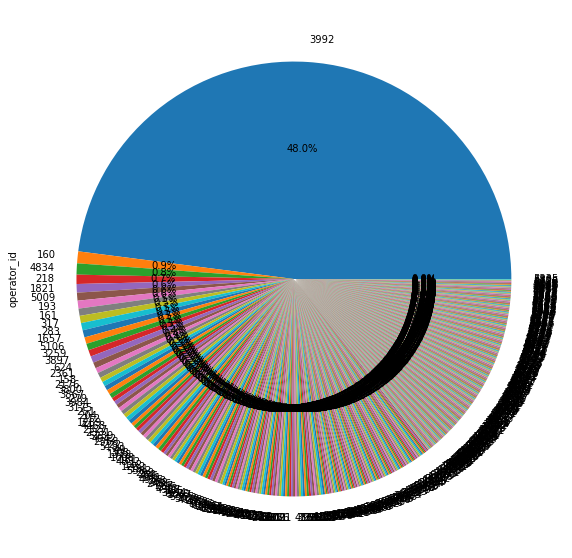

In [38]:
acidentesTrat['operator_id'].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%')

<p>O operador é a pessoa ou empresa que responde de fato pelo uso da aeronave, seja o proprietário ou preposto, fretador ou arrendatário.
